In [ ]:
pip install scikit-learn==1.6.1

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
water_pollution=pd.read_csv('/content/water_dataX.csv',encoding='latin1')
water_pollution

STATION CODE                                          LOCATIONS  \
0            1393               DAMANGANGA AT D/S OF MADHUBAN, DAMAN   
1            1399  ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...   
2            1475                                ZUARI AT PANCHAWADI   
3            3181                        RIVER ZUARI AT BORIM BRIDGE   
4            3182                       RIVER ZUARI AT MARCAIM JETTY   
...           ...                                                ...   
1986         1330            TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU   
1987         1450  PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...   
1988         1403                 GUMTI AT U/S SOUTH TRIPURA,TRIPURA   
1989         1404                GUMTI AT D/S SOUTH TRIPURA, TRIPURA   
1990         1726   CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA   

            STATE  Temp D.O. (mg/l)   PH CONDUCTIVITY (µmhos/cm)  \
0     DAMAN & DIU  30.6         6.7  7.5                     203   
1             GOA  29.8         5.7  7.2                     189   
2             GOA  29.5         6.3  6.9                     179   
3             GOA  29.7         5.8  6.9                      64   
4             GOA  29.5         5.8  7.3                      83   
...           ...   ...         ...  ...                     ...   
1986          NAN   NAN         7.9  738                     7.2   
1987          NAN    29         7.5  585                     6.3   
1988          NAN    28         7.6   98                     6.2   
1989          NAN    28         7.7   91                     6.5   
1990          NAN    29         7.6  110                     5.7   

     B.O.D. (mg/l) NITRATENAN N+ NITRITENANN (mg/l)  \
0              NAN                              0.1   
1                2                              0.2   
2              1.7                              0.1   
3              3.8                              0.5   
4              1.9                              0.4   
...            ...                              ...   
1986           2.7                            0.518   
1987           2.6                            0.155   
1988           1.2                              NAN   
1989           1.3                              NAN   
1990           1.1                              NAN   

     FECAL COLIFORM (MPN/100ml) TOTAL COLIFORM (MPN/100ml)Mean  year  
0                            11                             27  2014  
1                          4953                           8391  2014  
2                          3243                           5330  2014  
3                          5382                           8443  2014  
4                          3428                           5500  2014  
...                         ...                            ...   ...  
1986                      0.518                            202  2003  
1987                      0.155                            315  2003  
1988                        NAN                            570  2003  
1989                        NAN                            562  2003  
1990                        NAN                            546  2003  

[1991 rows x 12 columns]

In [ ]:
water_pollution.head()


STATION CODE                                          LOCATIONS  \
0         1393               DAMANGANGA AT D/S OF MADHUBAN, DAMAN   
1         1399  ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...   
2         1475                                ZUARI AT PANCHAWADI   
3         3181                        RIVER ZUARI AT BORIM BRIDGE   
4         3182                       RIVER ZUARI AT MARCAIM JETTY   

         STATE  Temp D.O. (mg/l)   PH CONDUCTIVITY (µmhos/cm) B.O.D. (mg/l)  \
0  DAMAN & DIU  30.6         6.7  7.5                     203           NAN   
1          GOA  29.8         5.7  7.2                     189             2   
2          GOA  29.5         6.3  6.9                     179           1.7   
3          GOA  29.7         5.8  6.9                      64           3.8   
4          GOA  29.5         5.8  7.3                      83           1.9   

  NITRATENAN N+ NITRITENANN (mg/l) FECAL COLIFORM (MPN/100ml)  \
0                              0.1                         11   
1                              0.2                       4953   
2                              0.1                       3243   
3                              0.5                       5382   
4                              0.4                       3428   

  TOTAL COLIFORM (MPN/100ml)Mean  year  
0                             27  2014  
1                           8391  2014  
2                           5330  2014  
3                           8443  2014  
4                           5500  2014

In [ ]:
water_pollution.columns

Index(['STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'D.O. (mg/l)', 'PH',
       'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)',
       'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)',
       'TOTAL COLIFORM (MPN/100ml)Mean', 'year'],
      dtype='object')

In [ ]:
water_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [ ]:
#Replacing the columns name
water_pollution.rename(columns={
    'D.O. (mg/l)': 'do',
    'PH': 'ph',
    'CONDUCTIVITY (µmhos/cm)': 'conductivity',
    'B.O.D. (mg/l)': 'bod',
    'NITRATENAN N+ NITRITENANN (mg/l)': 'nitrate', # Using the name from your .info()
    'FECAL COLIFORM (MPN/100ml)': 'fecal_coliform',
    'TOTAL COLIFORM (MPN/100ml)Mean': 'total_coliform', # Using the name from your .info()
    'Temp': 'temp'
}, inplace=True)

print("\n--- Renamed Columns ---")
print(water_pollution.columns)


--- Renamed Columns ---
Index(['STATION CODE', 'LOCATIONS', 'STATE', 'temp', 'do', 'ph',
       'conductivity', 'bod', 'nitrate', 'fecal_coliform', 'total_coliform',
       'year'],
      dtype='object')


In [ ]:
# Define the list of columns that *should* be numeric
features_to_convert = ['do', 'ph', 'conductivity', 'bod', 'nitrate', 'temp']

print(f"--- Before Conversion (dtype of 'do'): {water_pollution['do'].dtype} ---")
# Check a few non-numeric values before we convert
print("Example non-numeric values:")
print(water_pollution[pd.to_numeric(water_pollution['do'], errors='coerce').isna()]['do'].unique()[:5])

# --- The Conversion ---
# Loop through each column and apply pd.to_numeric
for col in features_to_convert:
    # errors='coerce' is the key. It turns non-numeric strings into NaN
    water_pollution[col] = pd.to_numeric(water_pollution[col], errors='coerce')

print(f"\n--- After Conversion (dtype of 'do'): {water_pollution['do'].dtype} ---")

print("\n--- New Data Info (note the Dtype changes) ---")
water_pollution.info()

--- Before Conversion (dtype of 'do'): object ---
Example non-numeric values:
['NAN']

--- After Conversion (dtype of 'do'): float64 ---

--- New Data Info (note the Dtype changes) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATION CODE    1991 non-null   object 
 1   LOCATIONS       1991 non-null   object 
 2   STATE           1991 non-null   object 
 3   temp            1899 non-null   float64
 4   do              1960 non-null   float64
 5   ph              1983 non-null   float64
 6   conductivity    1966 non-null   float64
 7   bod             1948 non-null   float64
 8   nitrate         1766 non-null   float64
 9   fecal_coliform  1991 non-null   object 
 10  total_coliform  1991 non-null   object 
 11  year            1991 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 186.8+ KB


In [ ]:
water_pollution.head()

STATION CODE                                          LOCATIONS  \
0         1393               DAMANGANGA AT D/S OF MADHUBAN, DAMAN   
1         1399  ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...   
2         1475                                ZUARI AT PANCHAWADI   
3         3181                        RIVER ZUARI AT BORIM BRIDGE   
4         3182                       RIVER ZUARI AT MARCAIM JETTY   

         STATE  temp   do   ph  conductivity  bod  nitrate fecal_coliform  \
0  DAMAN & DIU  30.6  6.7  7.5         203.0  NaN      0.1             11   
1          GOA  29.8  5.7  7.2         189.0  2.0      0.2           4953   
2          GOA  29.5  6.3  6.9         179.0  1.7      0.1           3243   
3          GOA  29.7  5.8  6.9          64.0  3.8      0.5           5382   
4          GOA  29.5  5.8  7.3          83.0  1.9      0.4           3428   

  total_coliform  year  
0             27  2014  
1           8391  2014  
2           5330  2014  
3           8443  2014  
4           5500  2014

In [ ]:
# --- Step 2 (Data Type Conversion) ---
# Make sure to run this cell first!

# Define all columns we will use
all_numeric_features = ['do', 'ph', 'conductivity', 'bod', 'nitrate', 'temp', 'fecal_coliform', 'total_coliform']

print("--- Converting columns to numeric ---")
for col in all_numeric_features:
    if col in water_pollution.columns:
        # errors='coerce' turns bad text into NaN
        water_pollution[col] = pd.to_numeric(water_pollution[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

print("Data conversion complete.")
water_pollution[all_numeric_features].info()

--- Converting columns to numeric ---
Data conversion complete.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   do              1960 non-null   float64
 1   ph              1983 non-null   float64
 2   conductivity    1966 non-null   float64
 3   bod             1948 non-null   float64
 4   nitrate         1766 non-null   float64
 5   temp            1899 non-null   float64
 6   fecal_coliform  1675 non-null   float64
 7   total_coliform  1859 non-null   float64
dtypes: float64(8)
memory usage: 124.6 KB


In [ ]:
import numpy as np
all_numeric_features = ['do', 'ph', 'conductivity', 'bod', 'nitrate', 'temp', 'fecal_coliform', 'total_coliform']

print("--- Data Ranges Before Cleaning Outliers ---")
print(water_pollution[all_numeric_features].describe())

# --- 1. Clean Impossible pH Values ---
# Set any pH value outside the 0-14 range to NaN (Not a Number)
water_pollution['ph'] = water_pollution['ph'].apply(lambda x: x if (pd.isna(x) or (0 <= x <= 14)) else np.nan)

# --- 2. Clean Other Extreme Outliers (using 99.9th percentile) ---
for col in ['conductivity', 'fecal_coliform', 'total_coliform', 'bod', 'nitrate']:
    # Calculate the 99.9th percentile (q)
    q = water_pollution[col].quantile(0.999)
    if pd.notna(q):
        # Cap the values: any value > q will be set to q
        water_pollution[col] = water_pollution[col].apply(lambda x: q if x > q else x)

print("\n--- Data Ranges After Cleaning Outliers ---")
print(water_pollution[all_numeric_features].describe())

print("\nOutlier cleaning complete.")

--- Data Ranges Before Cleaning Outliers ---
                do            ph  conductivity          bod      nitrate  \
count  1960.000000   1983.000000   1966.000000  1948.000000  1766.000000   
mean      6.392637    112.090674   1786.466394     6.940049     1.623079   
std       1.332938   1878.930716   5552.276223    29.400026     4.090481   
min       0.000000      0.000000      0.400000     0.100000     0.000000   
25%       5.900000      6.900000     78.000000     1.200000     0.240000   
50%       6.700000      7.300000    183.000000     1.896500     0.516000   
75%       7.200000      7.700000    592.750000     3.600000     1.500000   
max      11.400000  67115.000000  65700.000000   534.500000   108.700000   

              temp  fecal_coliform  total_coliform  
count  1899.000000    1.675000e+03    1.859000e+03  
mean     26.209814    3.625294e+05    5.336872e+05  
std       3.366388    8.764767e+06    1.423428e+07  
min      10.000000    0.000000e+00    0.000000e+00  
25%  

In [ ]:
print("--- Running CORRECTED WQI Label Calculation ---")

# --- 1. Define WQI Standards and Weights ---
standards = {
    'do': {'S': 10, 'V_o': 0},       # S: Ideal (saturation), V_o: Anoxic (0)
    'ph': {'S': 8.5, 'V_o': 7.0},     # S: Standard, V_o: Ideal
    'bod': {'S': 5, 'V_o': 0},        # S: Standard, V_o: Ideal
    'nitrate': {'S': 45, 'V_o': 0},   # S: Standard, V_o: Ideal
    'conductivity': {'S': 1000, 'V_o': 0} # S: Standard, V_o: Ideal
}

weights = {
    'do': 0.28,
    'ph': 0.16,
    'bod': 0.28,
    'nitrate': 0.16,
    'conductivity': 0.12
}

# --- 2. CORRECTED WQI Calculation Function ---
def calculate_quality_rating(value, param):
    if pd.isna(value):
        return np.nan

    s_i = standards[param]['S']
    v_o = standards[param]['V_o']

    # --- Pollutant Logic (BOD, Nitrate, Conductivity) ---
    if param in ['bod', 'nitrate', 'conductivity']:
        q_i = 100 * ((value - v_o) / (s_i - v_o))
        q_i = 100 - q_i # Invert: 0 is good, 100 is bad
        if q_i < 0: q_i = 0
        if q_i > 100: q_i = 100 # Cap at 100 (if value is 0)
        return q_i

    # --- Corrected DO Logic ---
    if param == 'do':
        q_i = 100 * ((value - v_o) / (s_i - v_o))
        if q_i < 0: q_i = 0
        if q_i > 100: q_i = 100
        return q_i

    # --- Corrected pH Logic ---
    if param == 'ph':
        if value < v_o: # (e.g., value is 6.5, ideal is 7)
            q_i = 100 * ((value - 5.5) / (v_o - 5.5)) # 5.5 is lowest acceptable
        else: # (e.g., value is 8, ideal is 7, standard is 8.5)
            q_i = 100 * ((s_i - value) / (s_i - v_o))
        if q_i < 0: q_i = 0
        if q_i > 100: q_i = 100
        return q_i

    return np.nan # Failsafe

# --- 3. Apply WQI Calculation to every row ---
wqi_scores = []
sum_weights = sum(weights.values())

for idx, row in water_pollution.iterrows():
    qi_wi_sum = 0
    effective_weights_sum = 0
    for param in standards.keys():
        q_i = calculate_quality_rating(row[param], param)
        if not pd.isna(q_i):
            w_i = weights[param]
            qi_wi_sum += q_i * w_i
            effective_weights_sum += w_i

    if effective_weights_sum == 0:
        wqi_scores.append(np.nan)
    else:
        wqi_scores.append(qi_wi_sum / effective_weights_sum)

water_pollution['wqi'] = wqi_scores

# --- 4. Create the Final Target Labels ---
bins = [0, 40, 70, 101] # [0-40), [40-70), [70-101)
labels = ["🔴 Contaminated", "🟡 Moderate", "🟢 Safe"]
water_pollution['wqi_label'] = pd.cut(water_pollution['wqi'], bins=bins, labels=labels, right=False)

water_pollution.dropna(subset=['wqi', 'wqi_label'], inplace=True)

print("--- CORRECTED WQI and Label Creation Complete ---")
print("Class distribution (new labels):")
print(water_pollution['wqi_label'].value_counts())

--- Running CORRECTED WQI Label Calculation ---
--- CORRECTED WQI and Label Creation Complete ---
Class distribution (new labels):
wqi_label
🟢 Safe            975
🟡 Moderate        844
🔴 Contaminated    168
Name: count, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example dataset (you can replace it with your own)
from sklearn.datasets import load_iris
data = load_iris()

X = data.data      # features
y = data.target    # labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))




Accuracy: 1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier  # ✅ Changed here

# --- 1. Define Features (X) and Target (y) ---

X = water_pollution[all_numeric_features]
y_raw = water_pollution['wqi_label']

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y_raw.shape}")

# --- 2. Encode the Target (y) ---
le = LabelEncoder()
y = le.fit_transform(y_raw)
print(f"\nTarget labels encoded: {list(le.classes_)}")

# --- 3. Create the Preprocessing Pipeline ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, all_numeric_features)
    ],
    remainder='passthrough'
)

# --- 4. Create the Full Decision Tree Pipeline ---
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5))
])

print("\n✅ Full Decision Tree pipeline created successfully.")
print("The 'SimpleImputer' in this pipeline will handle NaN values automatically.")
print(dt_pipeline)


Shape of X (features): (1987, 8)
Shape of y (target): (1987,)

Target labels encoded: ['🔴 Contaminated', '🟡 Moderate', '🟢 Safe']

✅ Full Decision Tree pipeline created successfully.
The 'SimpleImputer' in this pipeline will handle NaN values automatically.
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['do', 'ph', 'conductivity',
                                                   'bod', 'nitrate', 'temp',
                                                   'fecal_coliform',
                       

In [ ]:
from sklearn.model_selection import train_test_split



# X and y were defined in the previous step (Step 5)
# X = water_pollution[all_numeric_features]
# y = le.fit_transform(water_pollution['wqi_label'])

# --- 1. Train-Test Split ---
# We split our data into 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(
    X,           # The features (with NaN values)
    y,           # The numeric labels (0, 1, 2)
    test_size=0.2, # 20% for testing
    random_state=42, # Ensures we get the same split every time
    stratify=y       # Ensures balanced classes in both sets
)

print(f"Training set size (X_train): {X_train.shape}")
print(f"Testing set size (X_test):   {X_test.shape}")
print(f"Training labels size (y_train): {y_train.shape}")
print(f"Testing labels size (y_test):   {y_test.shape}")

Training set size (X_train): (1589, 8)
Testing set size (X_test):   (398, 8)
Training labels size (y_train): (1589,)
Testing labels size (y_test):   (398,)


--- Training Decision Tree Model ---
Training complete.

--- Model Evaluation on Test Set ---
                precision    recall  f1-score   support

🔴 Contaminated       0.83      0.74      0.78        34
    🟡 Moderate       0.82      0.85      0.83       169
        🟢 Safe       0.89      0.88      0.89       195

      accuracy                           0.85       398
     macro avg       0.85      0.82      0.83       398
  weighted avg       0.85      0.85      0.85       398

Plotting Confusion Matrix...


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARG

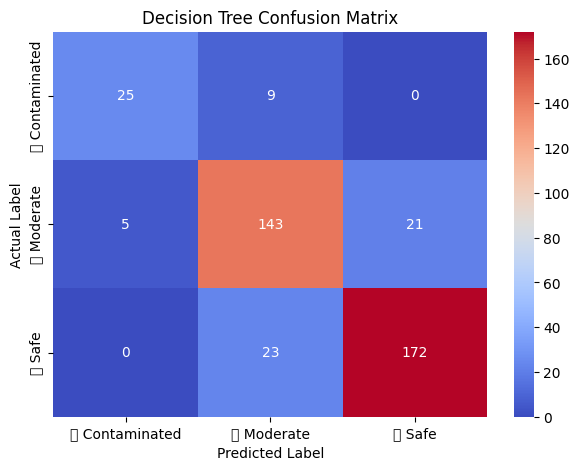

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Train the Model ---
print("--- Training Decision Tree Model ---")
dt_pipeline.fit(X_train, y_train)
print("Training complete.")

# --- 2. Evaluate the Model on the Test Set ---
print("\n--- Model Evaluation on Test Set ---")
y_pred = dt_pipeline.predict(X_test)

# --- 3. Print the Classification Report ---
report = classification_report(y_test, y_pred, target_names=le.classes_)
print(report)

# --- 4. Plot Confusion Matrix ---
print("Plotting Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
# --- 3. Save the trained model and encoder ---
import joblib

# --- Save the entire trained pipeline ---
model_filename = 'dt_model_pipeline.joblib'
joblib.dump(dt_pipeline, model_filename)

print(f"Model pipeline saved as: {model_filename}")

# --- Save the label encoder ---
encoder_filename = 'label_encoder.joblib'
joblib.dump(le, encoder_filename)

print(f"Label encoder saved as: {encoder_filename}")

print("\n--- Project Complete ---")
print("You now have two files in your environment that you can download.")
print("You can use these files in a web app (like Streamlit or FastAPI) to make live predictions.")


Model pipeline saved as: dt_model_pipeline.joblib
Label encoder saved as: label_encoder.joblib

--- Project Complete ---
You now have two files in your environment that you can download.
You can use these files in a web app (like Streamlit or FastAPI) to make live predictions.


In [ ]:
import joblib

# --- Load the trained pipeline and encoder ---
try:
    loaded_pipeline = joblib.load('/content/dt_model_pipeline.joblib')   # or 'dt_model_pipeline.joblib' if you saved a Decision Tree
    loaded_encoder = joblib.load('/content/label_encoder.joblib')
    print("✅ Model and encoder loaded successfully.")
except FileNotFoundError:
    print("❌ Error: Model files not found. Please make sure they were saved after training.")


✅ Model and encoder loaded successfully.


In [ ]:
import pandas as pd
import numpy as np
import joblib

# --- 1. Define the list of features the model needs ---
features = ['do', 'ph', 'conductivity', 'bod', 'nitrate', 'temp', 'fecal_coliform', 'total_coliform']
data_ranges = None # We will fill this from the 'water_pollution'

# --- 2. Load the saved model and encoder ---
try:
    loaded_pipeline = joblib.load('/content/dt_model_pipeline.joblib')
    loaded_encoder = joblib.load('/content/label_encoder.joblib4')
    print("--- Model and Encoder Loaded Successfully ---")
except FileNotFoundError:
    print("ERROR: Could not find 'rf_model_pipeline.joblib' or 'label_encoder.joblib'")
    print("Please make sure you have run Step 8 to save the files.")
except NameError:
    print("ERROR: A file was not found. Please re-run Step 8.")

# --- 3. Check if the original DataFrame 'water_pollution' exists and get ranges ---
try:
    _ =water_pollution.shape # Quick check to see if 'water_pollution' is in memory
    print("Original 'water_pollution' DataFrame found. Location lookup and data ranges are enabled.")
    # --- NEW: Calculate and store the min/max for each feature ---
    data_ranges = water_pollution[features].describe().loc[['min', 'max']]
    # print(data_ranges) # Uncomment this line if you want to see the ranges
except NameError:
    print("ERROR: Original 'water_pollution' DataFrame not found. Please re-run all steps starting from data loading.")
    print("Location lookup and data ranges will be disabled.")
    water_pollution = None # Ensure water_pollution is None if not found

# --- 4. Helper function to get manual user input (NOW WITH RANGES) ---
def get_manual_input():
    print("\n--- Enter Water Quality Values ---")
    print("(Press ENTER to leave a value as 'unknown' (NaN))")

    input_data = {}
    for feature in features:
        # Build the prompt string
        prompt = f"Enter value for {feature}"

        # --- NEW: Add the min/max range to the prompt ---
        if data_ranges is not None:
            min_val = data_ranges.loc['min', feature]
            max_val = data_ranges.loc['max', feature]
            # Format to 2 decimal places for a clean look
            prompt += f" (range: {min_val:.2f} to {max_val:.2f})"

        prompt += ": "
        # ---------------------------------------------------

        while True: # Loop until valid input is given
            val = input(prompt).strip()
            if val == "":
                input_data[feature] = np.nan
                break
            try:
                # Try to convert the input to a float
                input_data[feature] = float(val)
                break
            except ValueError:
                print(f"  Invalid input. Please enter a number or press ENTER.")

    return pd.DataFrame([input_data]) # Return as DataFrame

# --- 5. Helper function to get data from location ---
def get_location_data():
    if water_pollution is None:
        print("Location lookup is disabled because 'water_pollution' is not loaded.")
        return None

    print("\n--- Enter Location Name to Test ---")
    print("Examples from your data: 'KALI NADI', 'GANGA', 'YAMUNA', 'SABARMATI'")
    location_name = input("Enter a location name (case-sensitive): ").strip()

    # Search for this location in the original DataFrame
    location_data = water_pollution[water_pollution['LOCATIONS'].str.fullmatch(location_name, case=False)]

    if location_data.empty:
        print(f"No exact match for '{location_name}'. Trying a partial search...")
        location_data = water_pollution[water_pollution['LOCATIONS'].str.contains(location_name, case=False)]

    if location_data.empty:
        print(f"--- No location found matching '{location_name}' ---")
        return None

    print(f"\n--- Found {len(location_data)} samples for '{location_name}'. ---")
    print("Using the *first* available sample for prediction.")

    first_sample = location_data.iloc[0]
    input_water_pollution = first_sample[features].to_frame().T
    return input_water_pollution

# --- 6. Main Menu ---
input_water_pollution = None # This will store the final data for prediction

print("\n--- How would you like to test the model? ---")
print("  [1] Enter values manually")
print("  [2] Test a location from your dataset (e.g., 'KALI NADI')")

choice = input("Enter your choice (1 or 2): ").strip()

if choice == '1':
    input_water_pollution = get_manual_input()

elif choice == '2':
    input_water_pollution = get_location_data()

else:
    print("Invalid choice. Please run the cell again.")

# --- 7. Make Prediction (if data was collected) ---
if input_water_pollution is not None:

    print("\n--- Making prediction on the following data: ---")
    print(input_water_pollution.to_markdown(index=False))

    # --- 8. Predict ---
    prediction_numeric = loaded_pipeline.predict(input_water_pollution)

    # --- 9. Decode ---
    prediction_label = loaded_encoder.inverse_transform(prediction_numeric)

    print("\n" + "="*30)
    print("   🚀 MODEL PREDICTION 🚀")
    print(f"   The water quality is predicted to be: {prediction_label[0]}")
    print("="*30)

ERROR: Could not find 'rf_model_pipeline.joblib' or 'label_encoder.joblib'
Please make sure you have run Step 8 to save the files.
Original 'water_pollution' DataFrame found. Location lookup and data ranges are enabled.

--- How would you like to test the model? ---
  [1] Enter values manually
  [2] Test a location from your dataset (e.g., 'KALI NADI')
Enter your choice (1 or 2): 1

--- Enter Water Quality Values ---
(Press ENTER to leave a value as 'unknown' (NaN))
Enter value for do (range: 0.00 to 11.40): 11
Enter value for ph (range: 0.00 to 9.01): 1
Enter value for conductivity (range: 0.40 to 47203.04): 2222
Enter value for bod (range: 0.10 to 445.60): 55
Enter value for nitrate (range: 0.00 to 33.32): 4
Enter value for temp (range: 10.00 to 35.00): 14
Enter value for fecal_coliform (range: 0.00 to 158988577.74): 455454
Enter value for total_coliform (range: 0.00 to 180227826.34): 444444

--- Making prediction on the following data: ---
|   do |   ph |   conductivity |   bod |   